In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import os

In [ ]:

data = pd.read_csv('dataPlev.csv')
data.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal


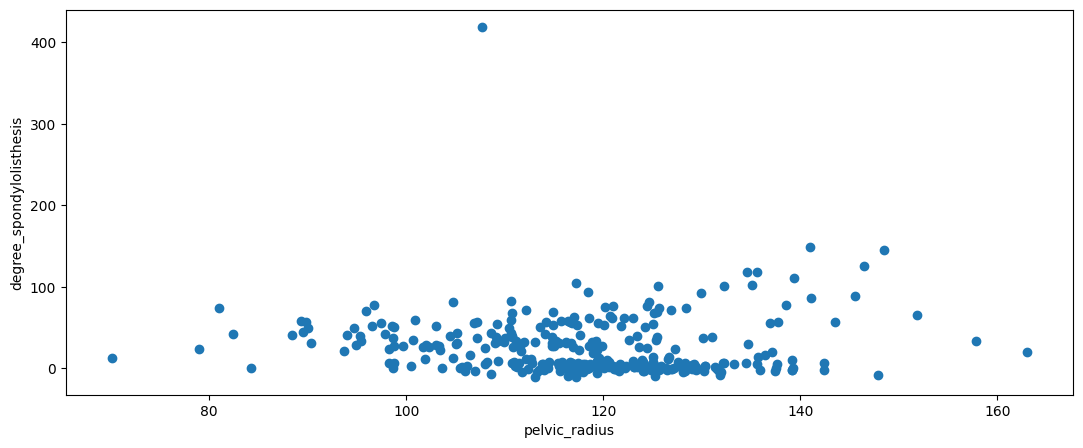

In [ ]:
x = data['pelvic_radius']
y = data['degree_spondylolisthesis']
plt.figure(figsize=(13,5))
plt.scatter(x,y)
plt.xlabel('pelvic_radius')
plt.ylabel('degree_spondylolisthesis')
plt.show()

In [ ]:
df = data.loc[:, ['degree_spondylolisthesis', 'pelvic_radius']]
df.head()

,degree_spondylolisthesis,pelvic_radius
0,-0.254400,98.672917
1,4.564259,114.405425
2,-3.530317,105.985135
3,11.211523,101.868495
4,7.918501,108.168725


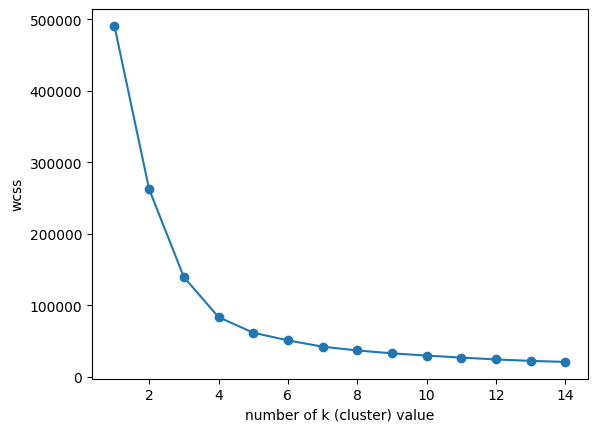

In [ ]:
# which k value to choose
from sklearn.cluster import KMeans
wcss = []
for k in range(1,15):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_) # kmeans.inertia : calculate wcss

plt.plot(range(1,15), wcss, '-o')
plt.xlabel('number of k (cluster) value')
plt.ylabel('wcss')
plt.show()

In [ ]:
# Use the following distance metric on both types of clustering

from scipy.spatial.distance import euclidean, cityblock, chebyshev, mahalanobis
import numpy as np

# a) Euclidean distance
# Example: Calculate distance between the first two rows
row1 = df.iloc[0].values
row2 = df.iloc[1].values
euclidean_dist = euclidean(row1, row2)
print("Euclidean distance:", euclidean_dist)

# b) Manhattan distance
manhattan_dist = cityblock(row1, row2)
print("Manhattan distance:", manhattan_dist)

# c) Maximum norm
max_norm_dist = chebyshev(row1, row2)
print("Maximum norm distance:", max_norm_dist)

# d) Mahalanobis distance
# Calculate the covariance matrix
cov_matrix = np.cov(df.values.T)
# Calculate Mahalanobis distance (requires invertible covariance matrix)
try:
  mahalanobis_dist = mahalanobis(row1, row2, np.linalg.inv(cov_matrix))
  print("Mahalanobis distance:", mahalanobis_dist)
except np.linalg.LinAlgError:
  print("Covariance matrix is not invertible. Cannot calculate Mahalanobis distance.")

# e) Inner product space (dot product)
inner_product = np.dot(row1, row2)
print("Inner product:", inner_product)


Euclidean distance: 16.453914410389874
Manhattan distance: 20.551167280999998
Maximum norm distance: 15.73250865
Mahalanobis distance: 1.192022804714566
Inner product: 11287.555868907148


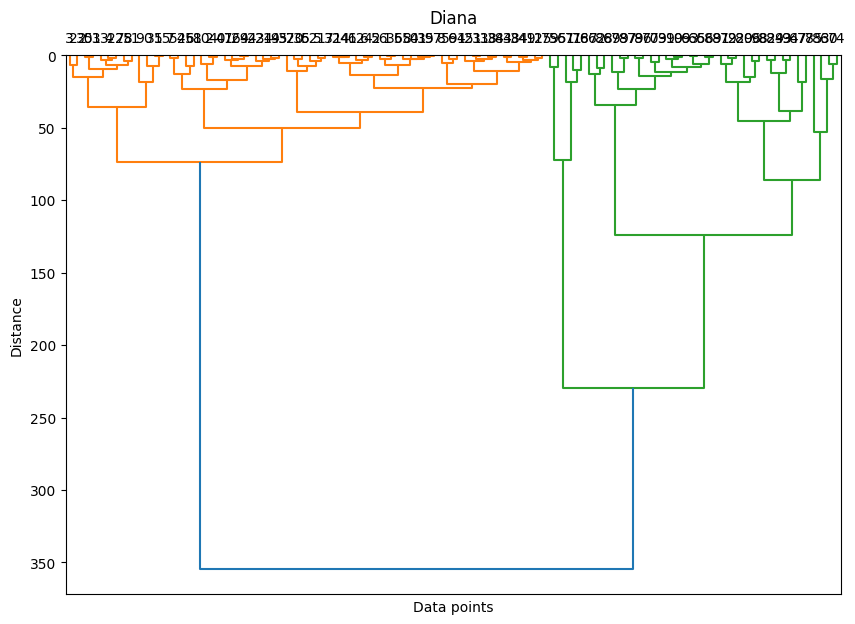

In [ ]:
# hierarchical clustering
# Divisive : Diana

from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame from the previous code

# Perform hierarchical clustering (divisive - Diana)
# Note: Diana is not directly available in scikit-learn.
# We can use AgglomerativeClustering with the 'ward' linkage and then reverse the process.
# This is an approximation of divisive clustering.

# Choose the number of clusters (you can experiment with different values)
n_clusters = 3

# Perform hierarchical clustering (agglomerative)
model = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
labels = model.fit_predict(df)

# Calculate the linkage matrix
Z = linkage(df.head(100), 'ward')

# Plot the dendrogram (optional)
# To visualize the hierarchical clustering process
plt.figure(figsize=(10, 7))
dendrogram(Z, orientation='bottom',
            leaf_rotation=0,
            leaf_font_size=10,
            show_contracted=True)
plt.title('Diana')
plt.xlabel('Data points')
plt.ylabel('Distance')
plt.show()

# Now you have the cluster labels in the 'labels' variable.

Average Diana distance: 24.487917100436


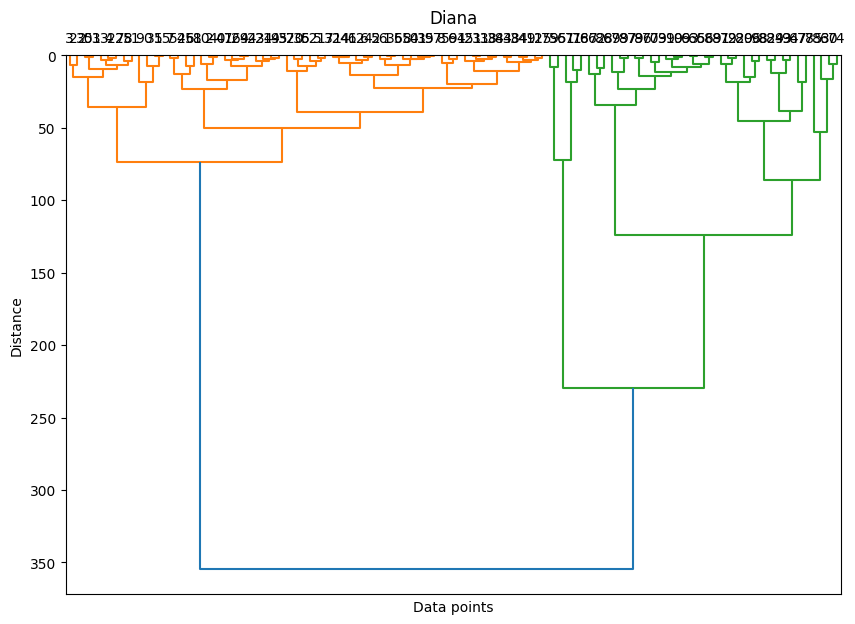

In [ ]:
# prompt: Find the average distance for divisve diana and plot the diana

import matplotlib.pyplot as plt
import numpy as np
from scipy.spatial.distance import pdist, squareform

# Calculate the average distance between data points within each cluster
def calculate_average_distance(df, labels):
  cluster_distances = []
  for cluster_id in np.unique(labels):
    cluster_data = df[labels == cluster_id]
    distances = pdist(cluster_data)
    if distances.size > 0:
      average_distance = np.mean(distances)
      cluster_distances.append(average_distance)
  return np.mean(cluster_distances) if cluster_distances else 0

average_diana_distance = calculate_average_distance(df, labels)
print("Average Diana distance:", average_diana_distance)


# Assuming 'Z' is the linkage matrix from your hierarchical clustering
plt.figure(figsize=(10, 7))
dendrogram(Z, orientation='bottom',
            leaf_rotation=0,
            leaf_font_size=10,
            show_contracted=True)
plt.title('Diana')
plt.xlabel('Data points')
plt.ylabel('Distance')
plt.show()


In [ ]:
# prompt: Find the average distance for divisve diana

import numpy as np
from scipy.spatial.distance import pdist, squareform

# Calculate the pairwise distances between all data points
distances = pdist(df, metric='euclidean')  # You can change the metric here

# Convert the condensed distance matrix to a square matrix
distance_matrix = squareform(distances)

# Calculate the average distance for each cluster
cluster_distances = []
for i in range(n_clusters):
    cluster_indices = [j for j, label in enumerate(labels) if label == i]
    cluster_data = df.iloc[cluster_indices]
    if len(cluster_data) > 1:
        cluster_distances.append(np.mean(pdist(cluster_data)))
    else:
        cluster_distances.append(0)  # Or handle single-point clusters differently


average_distance_diana = np.mean(cluster_distances)
print("Average distance for divisive diana:", average_distance_diana)


Average distance for divisive diana: 16.325278066957335


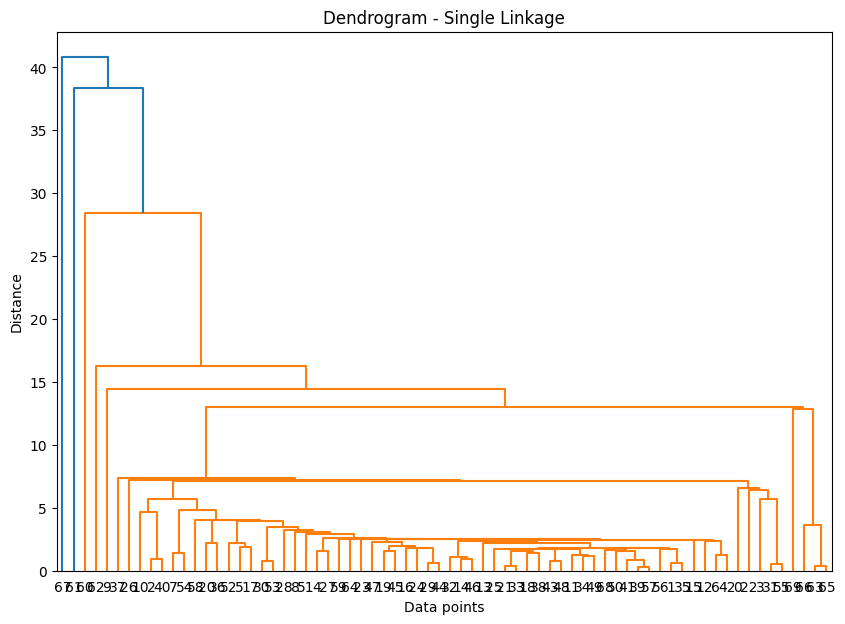

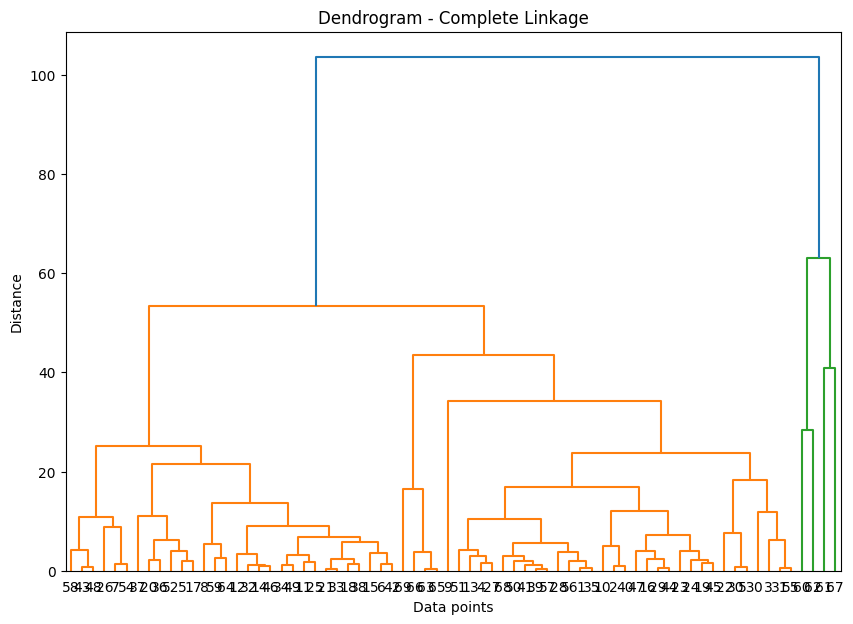

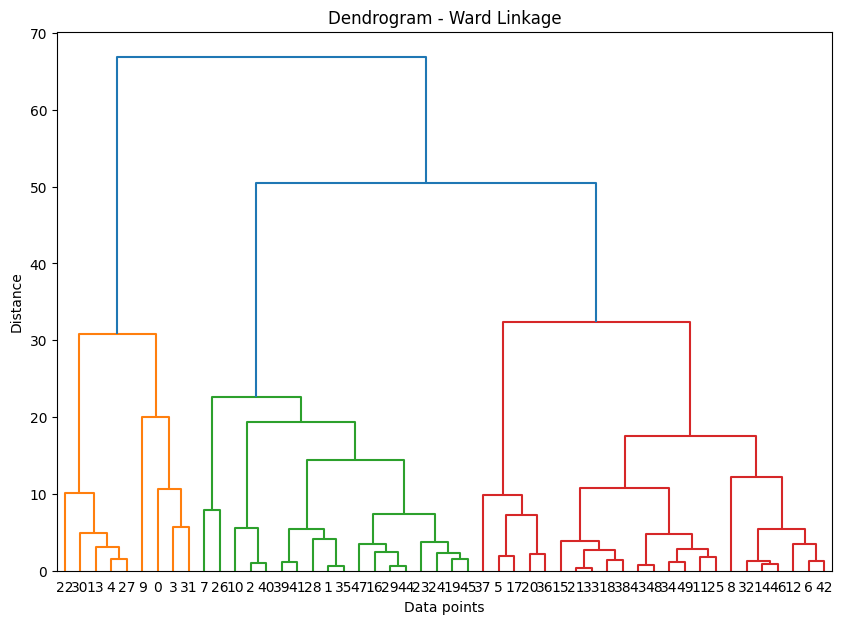

In [ ]:
# hierarchical clustering of Aggomerative : Agnes (single, complete and Ward)

import matplotlib.pyplot as plt
# Assuming 'df' is your DataFrame from the previous code

# Perform hierarchical clustering (agglomerative - Agnes)
# Single linkage
model_single = AgglomerativeClustering(n_clusters=3, linkage='single')
labels_single = model_single.fit_predict(df)

# Complete linkage
model_complete = AgglomerativeClustering(n_clusters=3, linkage='complete')
labels_complete = model_complete.fit_predict(df)

# Ward linkage
model_ward = AgglomerativeClustering(n_clusters=3, linkage='ward')
labels_ward = model_ward.fit_predict(df)

# Calculate the linkage matrix for each linkage type
Z_single = linkage(df.head(70), 'single')
Z_complete = linkage(df.head(70), 'complete')
Z_ward = linkage(df.head(50), 'ward')

# Plot the dendrogram for each linkage type (optional)
# To visualize the hierarchical clustering process
plt.figure(figsize=(10, 7))
dendrogram(Z_single, # Use the linkage matrix Z_single here
            leaf_rotation=0,
            leaf_font_size=10,
            show_contracted=True)
plt.title('Dendrogram - Single Linkage')
plt.xlabel('Data points')
plt.ylabel('Distance')
plt.show()

plt.figure(figsize=(10, 7))
dendrogram(Z_complete, # Use the linkage matrix Z_complete here
            leaf_rotation=0,
            leaf_font_size=10,
            show_contracted=True)
plt.title('Dendrogram - Complete Linkage')
plt.xlabel('Data points')
plt.ylabel('Distance')
plt.show()

plt.figure(figsize=(10, 7))
dendrogram(Z_ward, # Use the linkage matrix Z_ward here
            leaf_rotation=0,
            leaf_font_size=10,
            show_contracted=True)
plt.title('Dendrogram - Ward Linkage')
plt.xlabel('Data points')
plt.ylabel('Distance')
plt.show()

# Now you have the cluster labels for each linkage type in the respective variables
# (labels_single, labels_complete, labels_ward).


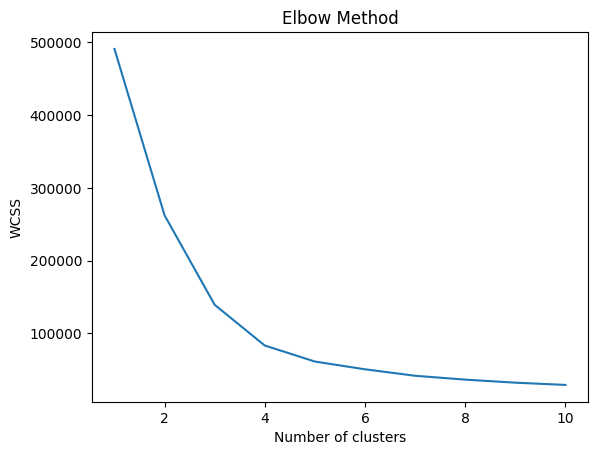

In [ ]:
# Evaluation technique to use for both clustering
# a) Elbow

import matplotlib.pyplot as plt
# Elbow method for K-Means
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


In [ ]:
!pip install kneed==0.8.1

Silhouette score for K-Means: 0.5483600192579737
Silhouette score for Hierarchical Clustering: 0.5144275520853577


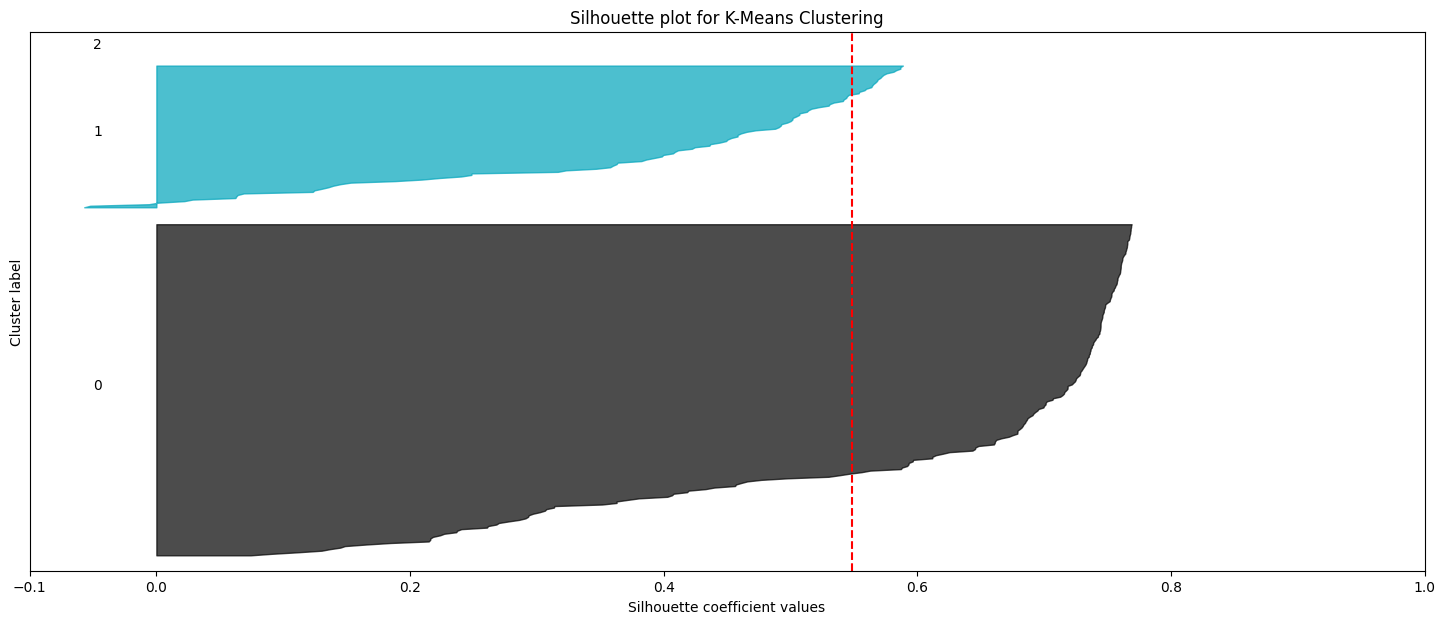

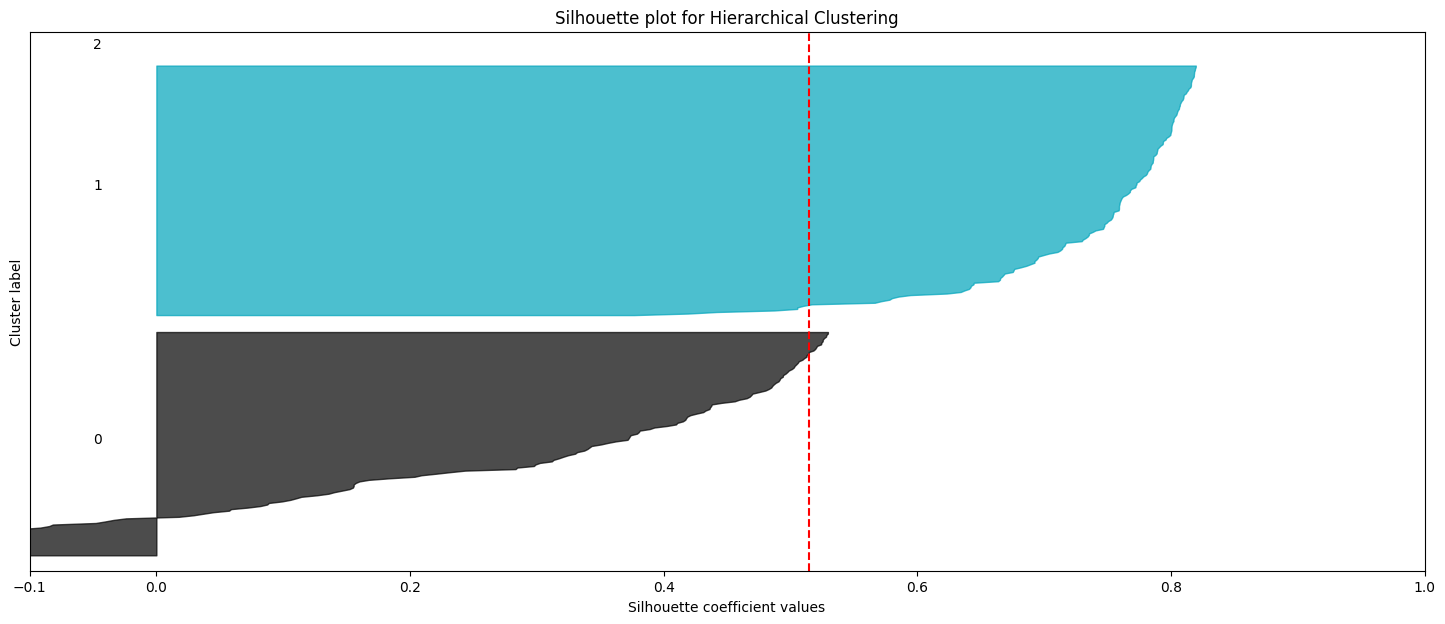

In [ ]:

#  Silhoutte score (Histogram)

import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import silhouette_score, silhouette_samples
import matplotlib.cm as cm

# Calculate silhouette score for K-Means
kmeans = KMeans(n_clusters=3)  # Choose the optimal number of clusters
kmeans_labels = kmeans.fit_predict(df)
silhouette_avg_kmeans = silhouette_score(df, kmeans_labels)
print("Silhouette score for K-Means:", silhouette_avg_kmeans)

# Calculate silhouette score for Hierarchical Clustering
hierarchical_labels = model_ward.fit_predict(df)  # Use the labels from the best linkage
silhouette_avg_hierarchical = silhouette_score(df, hierarchical_labels)
print("Silhouette score for Hierarchical Clustering:", silhouette_avg_hierarchical)


# Silhouette analysis for K-Means
n_clusters = 3  # Choose the optimal number of clusters
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(18, 7)
ax.set_xlim([-0.1, 1])
ax.set_ylim([0, len(df) + (n_clusters + 1) * 10])
cluster_labels = kmeans_labels
silhouette_avg = silhouette_score(df, cluster_labels)
sample_silhouette_values = silhouette_samples(df, cluster_labels)
y_lower = 10
for i in range(n_clusters):
    ith_cluster_silhouette_values = \
        sample_silhouette_values[cluster_labels == i]
    ith_cluster_silhouette_values.sort()
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i
    color = cm.nipy_spectral(float(i) / n_clusters)
    ax.fill_betweenx(np.arange(y_lower, y_upper),
                      0, ith_cluster_silhouette_values,
                      facecolor=color, edgecolor=color, alpha=0.7)
    ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    y_lower = y_upper + 10
ax.set_title("Silhouette plot for K-Means Clustering")
ax.set_xlabel("Silhouette coefficient values")
ax.set_ylabel("Cluster label")
ax.axvline(x=silhouette_avg, color="red", linestyle="--")
ax.set_yticks([])
ax.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
plt.show()


# Silhouette analysis for Hierarchical Clustering
n_clusters = 3  # Choose the optimal number of clusters
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(18, 7)
ax.set_xlim([-0.1, 1])
ax.set_ylim([0, len(df) + (n_clusters + 1) * 10])
cluster_labels = hierarchical_labels
silhouette_avg = silhouette_score(df, cluster_labels)
sample_silhouette_values = silhouette_samples(df, cluster_labels)
y_lower = 10
for i in range(n_clusters):
    ith_cluster_silhouette_values = \
        sample_silhouette_values[cluster_labels == i]
    ith_cluster_silhouette_values.sort()
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i
    color = cm.nipy_spectral(float(i) / n_clusters)
    ax.fill_betweenx(np.arange(y_lower, y_upper),
                      0, ith_cluster_silhouette_values,
                      facecolor=color, edgecolor=color, alpha=0.7)
    ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    y_lower = y_upper + 10
ax.set_title("Silhouette plot for Hierarchical Clustering")
ax.set_xlabel("Silhouette coefficient values")
ax.set_ylabel("Cluster label")
ax.axvline(x=silhouette_avg, color="red", linestyle="--")
ax.set_yticks([])
ax.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
plt.show()


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.cluster import KMeans
from scipy.spatial.distance import euclidean, cityblock, chebyshev, mahalanobis
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score, silhouette_samples
import matplotlib.cm as cm
warnings.filterwarnings('ignore')

data = pd.read_csv('datalab8.csv')
df = data.loc[:, ['degree_spondylolisthesis', 'pelvic_radius']]

# --- Distance Metrics ---

# a) Euclidean distance
row1 = df.iloc[0].values
row2 = df.iloc[1].values
euclidean_dist = euclidean(row1, row2)
print("Euclidean distance:", euclidean_dist)

# b) Manhattan distance
manhattan_dist = cityblock(row1, row2)
print("Manhattan distance:", manhattan_dist)

# c) Maximum norm
max_norm_dist = chebyshev(row1, row2)
print("Maximum norm distance:", max_norm_dist)

# d) Mahalanobis distance
cov_matrix = np.cov(df.values.T)
try:
  mahalanobis_dist = mahalanobis(row1, row2, np.linalg.inv(cov_matrix))
  print("Mahalanobis distance:", mahalanobis_dist)
except np.linalg.LinAlgError:
  print("Covariance matrix is not invertible. Cannot calculate Mahalanobis distance.")

# e) Inner product space (dot product)
inner_product = np.dot(row1, row2)
print("Inner product:", inner_product)

# --- Hierarchical Clustering ---

# Divisive : Diana (Approximation using AgglomerativeClustering)
n_clusters = 3
model_diana = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
labels_diana = model_diana.fit_predict(df)
Z_diana = linkage(df.head(70), 'ward')

# Agglomerative : Agnes (single, complete, and Ward)
# Single linkage
model_single = AgglomerativeClustering(n_clusters=3, linkage='single')
labels_single = model_single.fit_predict(df)
Z_single = linkage(df.head(70), 'single')

# Complete linkage
model_complete = AgglomerativeClustering(n_clusters=3, linkage='complete')
labels_complete = model_complete.fit_predict(df)
Z_complete = linkage(df.head(70), 'complete')

# Ward linkage
model_ward = AgglomerativeClustering(n_clusters=3, linkage='ward')
labels_ward = model_ward.fit_predict(df)
Z_ward = linkage(df.head(50), 'ward')

# --- Distance Metrics for Clusterings ---

# Calculate distances between clusters for each clustering method and distance metric
# ... (You would need to define how you want to measure distances between clusters.
#      For example, you could calculate the average distance between points in different clusters.)
# Example:
# To calculate the average distance between points in different clusters for Euclidean distance:
# ... (This would require iterating through clusters and calculating distances between points)

# --- Visualization (Optional) ---

# Plot dendrograms for each clustering method
plt.figure(figsize=(10, 7))
dendrogram(Z_diana,
            leaf_rotation=0,
            leaf_font_size=10,
            show_contracted=True)
plt.title('Dendrogram - Diana')
plt.xlabel('Data points')
plt.ylabel('Distance')
plt.show()

plt.figure(figsize=(10, 7))
dendrogram(Z_single,
            leaf_rotation=0,
            leaf_font_size=10,
            show_contracted=True)
plt.title('Dendrogram - Agnes (Single Linkage)')
plt.xlabel('Data points')
plt.ylabel('Distance')
plt.show()

plt.figure(figsize=(10, 7))
dendrogram(Z_complete,
            leaf_rotation=0,
            leaf_font_size=10,
            show_contracted=True)
plt.title('Dendrogram - Agnes (Complete Linkage)')
plt.xlabel('Data points')
plt.ylabel('Distance')
plt.show()

plt.figure(figsize=(10, 7))
dendrogram(Z_ward,
            leaf_rotation=0,
            leaf_font_size=10,
            show_contracted=True)
plt.title('Dendrogram - Agnes (Ward Linkage)')
plt.xlabel('Data points')
plt.ylabel('Distance')
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: 'datalab8.csv'